In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data

In [6]:
data=pd.read_csv('hour.csv')

In [7]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [11]:
data.shape[0]

17379

In [12]:
data.shape[1]

17

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# check if registered + casual =cnt for all records. if not row is junk and be dropped

data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
data['registered']+data['casual']!=data['cnt']

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [26]:
np.sum(data['registered']+data['casual']!=data['cnt'])

0

In [25]:
#if register + casual!=cnt, then drop

data.drop(data[data['registered']+data['casual']!=data['cnt']].index, inplace=True)

In [20]:
# months values should be 1-12 only

data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
data.mnth.value_counts()

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

In [23]:
# hour values b/n 0-23

data['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [27]:
# 4th one

data.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [29]:
inp1=data.drop(['casual','registered','dteday','instant'],axis=1).copy()

In [30]:
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [32]:
#5

inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:xlabel='temp', ylabel='Density'>

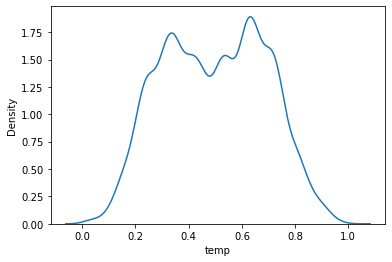

In [33]:
# density plot

sns.kdeplot(inp1['temp'])

C:\Users\et00823\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

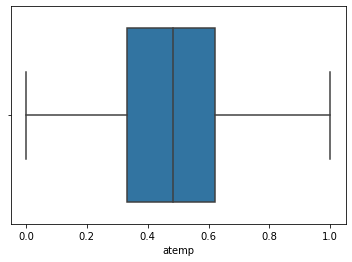

In [38]:
sns.boxplot(inp1.atemp) #so no outliers

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>,
        <AxesSubplot:title={'center':'hr'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weathersit'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

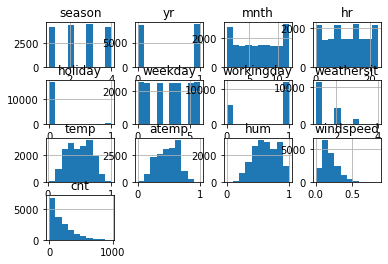

In [40]:
inp1.hist()

<AxesSubplot:xlabel='hum', ylabel='Count'>

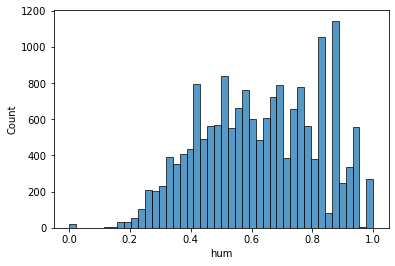

In [41]:
sns.histplot(inp1.hum)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

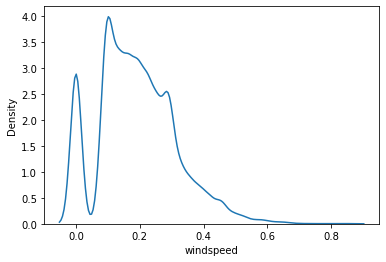

In [43]:
sns.kdeplot(inp1['windspeed']) #density

C:\Users\et00823\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

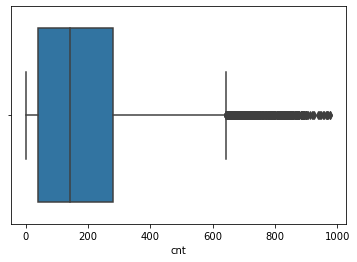

In [44]:
sns.boxplot(inp1.cnt)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

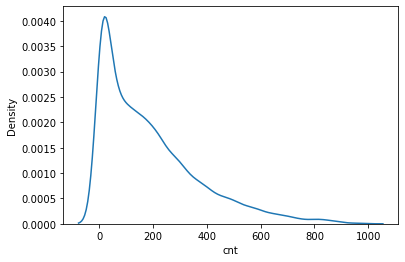

In [45]:
sns.kdeplot(inp1['cnt'])

In [46]:
#outlier treatment

#cnt looks ike some hrs have rather higher values. need to treat outliers

inp1.cnt.quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.99])


0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

C:\Users\et00823\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

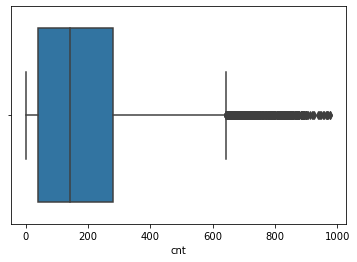

In [47]:
sns.boxplot(inp1.cnt)

In [48]:
inp2=inp1[inp1.cnt<563].copy()

In [49]:
inp2.shape

(16502, 13)

C:\Users\et00823\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

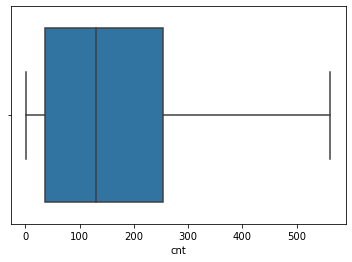

In [50]:
sns.boxplot(inp2.cnt)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

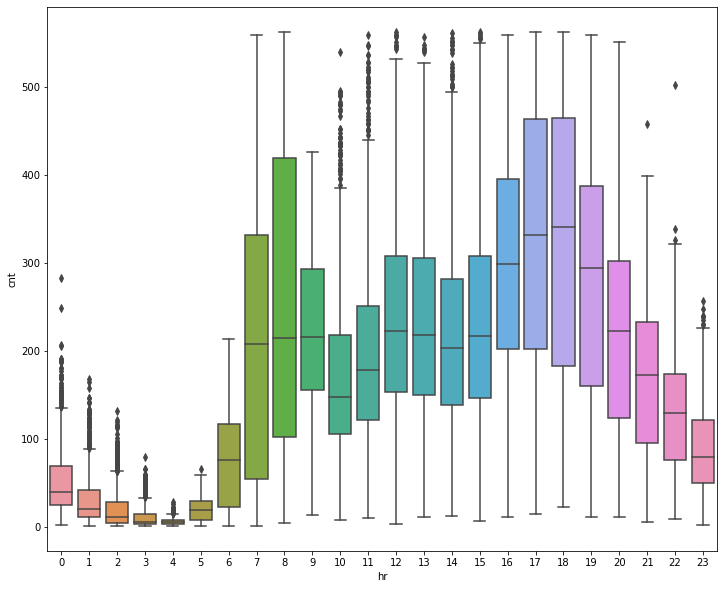

In [53]:
#8
#bivariate analysis

#boxplot for count vs hr

plt.figure(figsize=[12,10])
sns.boxplot(x='hr',y='cnt',data=inp2)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

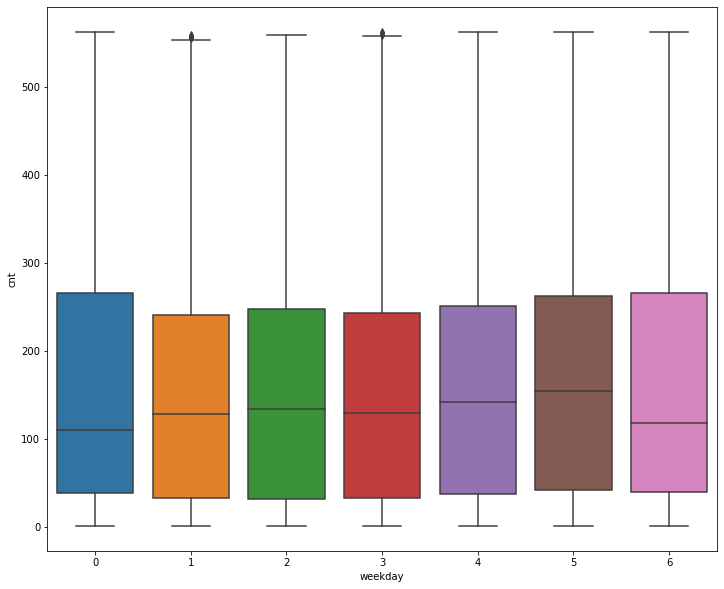

In [54]:
#make boxplot for cnt vs weekday

plt.figure(figsize=[12,10])
sns.boxplot(x='weekday',y='cnt',data=inp2)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

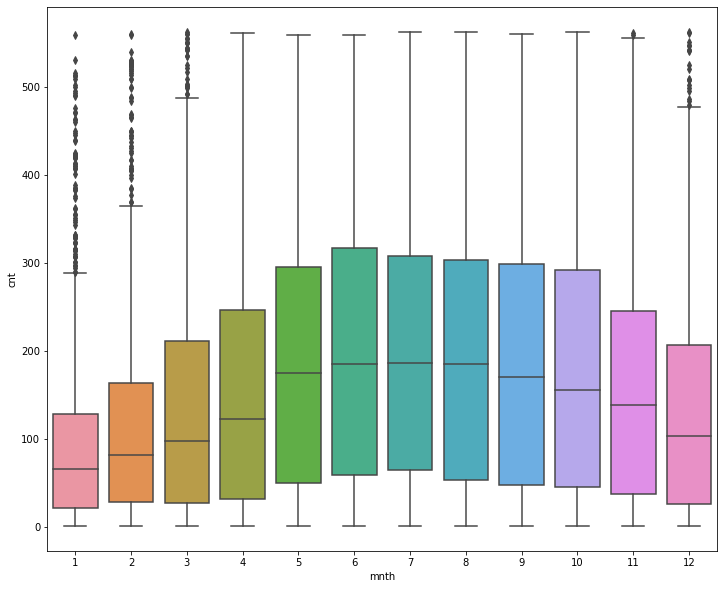

In [61]:
#makeboxplot for cnt vs month

plt.figure(figsize=[12,10])
sns.boxplot(x='mnth',y='cnt',data=inp2)

<AxesSubplot:xlabel='season', ylabel='cnt'>

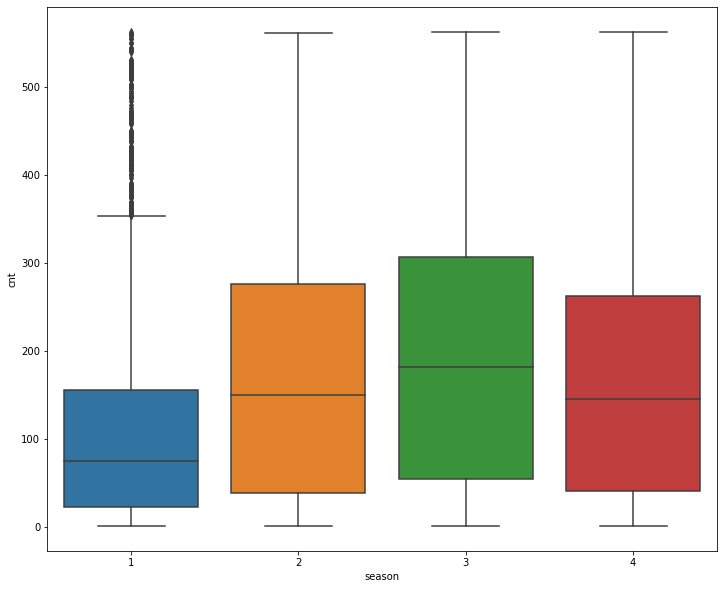

In [62]:
plt.figure(figsize=[12,10])
sns.boxplot(x='season',y='cnt',data=inp2)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

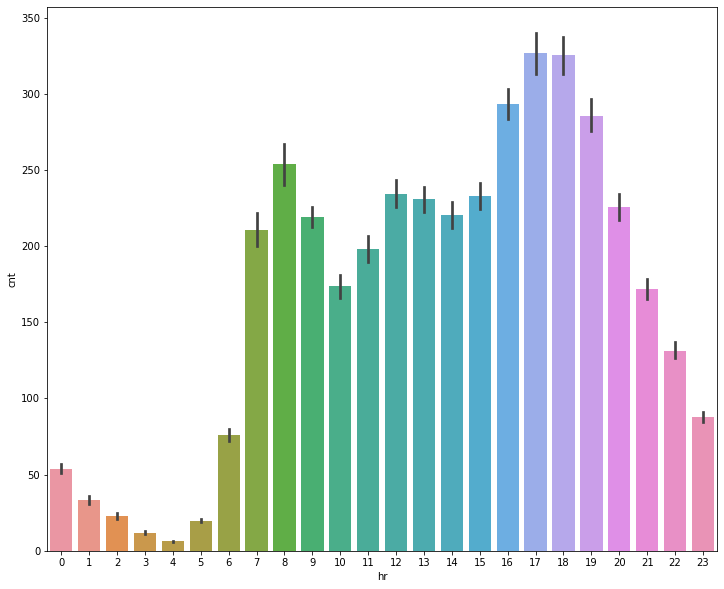

In [65]:
# make a barplot with median value of cnt for each hr
plt.figure(figsize=[12,10])
sns.barplot(x='hr',y='cnt',data=inp2)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

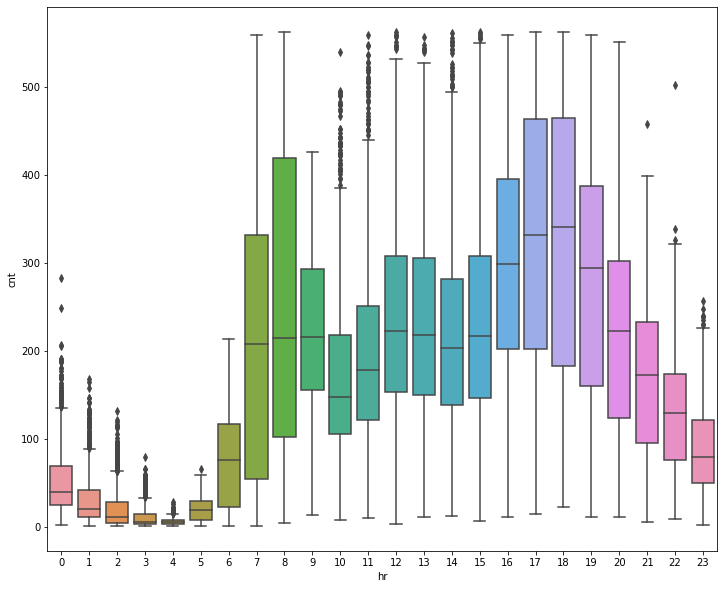

In [66]:
plt.figure(figsize=[12,10])
sns.boxplot(x='hr',y='cnt',data=inp2)

In [67]:
#correlation matrix for variables atemp,temp,hum and windspeed

#highest corr?

inp2.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [70]:
corr=inp2[['atemp','temp','hum','windspeed']].corr()
corr

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


<AxesSubplot:>

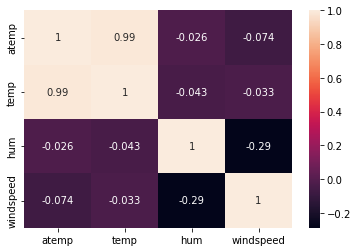

In [71]:
sns.heatmap(corr,annot=True)

In [73]:
#8 preprocessing

# replace 5,6,7,8,9,10 with 5 ..since they have similar count values

inp3=inp2.copy()



In [76]:
inp3.mnth[inp3.mnth.isin([5,6,7,8,9,10])]=5

C:\Users\et00823\AppData\Local\Temp\ipykernel_1616\260557782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.mnth[inp3.mnth.isin([5,6,7,8,9,10])]=5


In [77]:
inp3['mnth'].value_counts()

5     8126
12    1455
1     1429
3     1412
11    1392
4     1349
2     1339
Name: mnth, dtype: int64

In [78]:
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11


C:\Users\et00823\AppData\Local\Temp\ipykernel_1616\2560363286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
C:\Users\et00823\AppData\Local\Temp\ipykernel_1616\2560363286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11


In [79]:
inp3['hr'].value_counts()

0     4276
11    3482
22     728
23     728
9      727
10     727
20     727
21     727
6      725
7      724
16     689
19     671
8      547
18     546
17     478
Name: hr, dtype: int64

In [80]:
# object data cant work with ml - convert to numerical

#binary - student -- yes or no ---yes(1),no(0) label encoding

# not applicable for non-binary

# solution is dummy encoding





In [81]:
inp3.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [82]:
inp3=pd.get_dummies(inp3, columns =['season','weathersit','weekday','mnth','hr'])

In [83]:
inp3.shape

(16502, 45)

In [84]:
inp3

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,1,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,1,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,1,0,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,1,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
# machine learning

#split -training and testing set

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(1np3, test_size=0.3, random_state=5) #random selection 10



SyntaxError: invalid syntax (3360028384.py, line 7)

In [88]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp3,test_size=0.3,random_state=5)

In [89]:
df_train.shape

(11551, 45)

In [90]:
df_test.shape

(4951, 45)

In [96]:
#indep var and dep var cnt

#x output is cnt y_test = df_test.pop('cnt') x_test=df_test

y_train = df_train.pop('cnt')
x_train= df_train

KeyError: 'cnt'

In [95]:
y_test = df_test.pop('cnt')
x_test=df_test

In [97]:
y_train

10182    428
13824     17
3508      12
2649     196
5772      98
        ... 
740       39
1032     206
5565     440
3048     146
2915     188
Name: cnt, Length: 11551, dtype: int64

In [98]:
x_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
10182,1,0,1,0.20,0.2273,0.59,0.1045,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13824,1,0,0,0.70,0.6667,0.84,0.2239,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3508,0,0,1,0.66,0.5909,0.94,0.1343,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2649,0,0,1,0.52,0.5000,1.00,0.0896,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5772,0,0,1,0.64,0.6061,0.73,0.1642,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,1,0.16,0.1364,0.43,0.3582,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,0,1,0.32,0.3030,0.22,0.2239,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5565,0,0,1,0.74,0.6818,0.55,0.2985,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3048,0,0,1,0.50,0.4848,0.72,0.2537,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
y_test

9946     163
4069     136
3747      23
9356     410
2780     371
        ... 
7626     142
4265     381
17288     15
10773     59
7113      19
Name: cnt, Length: 4951, dtype: int64

In [100]:
x_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
9946,1,0,1,0.36,0.3636,0.81,0.1045,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4069,0,0,1,0.76,0.7273,0.66,0.2537,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3747,0,0,1,0.70,0.6515,0.65,0.2239,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9356,1,0,1,0.34,0.3333,0.23,0.1642,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2780,0,0,0,0.54,0.5152,0.43,0.1343,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626,0,0,0,0.28,0.2576,0.52,0.2985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4265,0,0,1,0.82,0.6970,0.21,0.2537,0,0,1,...,0,1,0,0,0,0,0,0,0,0
17288,1,0,1,0.24,0.2576,0.60,0.0896,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10773,1,0,1,0.40,0.4091,0.47,0.2985,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
#linear regression

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [103]:
#give training
linear_reg.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred = linear_reg.predict(x_test)

In [106]:
y_pred

array([190.04638672, 173.08081055,   8.96704102, ...,  -5.64819336,
        81.5847168 , -74.55126953])

In [107]:
# cal r2 score

from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.5152275688559946
